## What to expect after graduation?
---

- 본 노트북은 Kaggle의 *Where it Pays to Attend College* 라는 python notebook을 보고 영감을 받아 작성됨 
- 노트북의 주소는 다음과 같다.
- https://www.kaggle.com/skalskip/what-to-expect-after-graduation-visualization


- 본 노트북에서 사용될 데에터셋은 다음 링크를 통해 다운 받을 수 있다.
- https://www.kaggle.com/wsj/college-salaries


---

## Table of Contents

* 1. Introduction
* 2. Importing dataset and data Preprocessing
    - 2.1. Import essential libraries
    - 2.2. Import datasets
    - 2.3. Let's summarize the datasets
    - 2.4. Data preprocessing
* 3. Data Visualization
    - 3.1. Starting median salary distribution by major
    - 3.2. So you want to be a lawyer?
    - 3.3. Time makes all the difference
    - 3.4. Long term investment
    - 3.5. Biggest money makers

---


## 1. Introduction

**Where it Pays to Attend College** 라는 이름으로 3년전에 올라온 데이터 셋이다. 다음 데이터셋은 **College의 Type에 따라 Salary Increase가 얼마나되는지** , **지역에 따라 Salary가 얼마나 다른지** , **전공에 따라 Salary가 얼마나 오르는지** 총 3개지의 데이터가 준비되어있다. 우리는 위 데이터를 바탕으로 EDA 분석을 실시하여 의미있는 해석을 도출해는것을 목표로 한다.

---

## 2. Importing dataset and data preprocessing

### 2.1. Importing essential libraries

In [115]:
import pandas as pd # 데이터를 불러오는 용도
import numpy as np # 계산용 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

### 2.2. Importing datasets

In [116]:
majors = pd.read_csv('degrees-that-pay-back.csv', encoding = 'utf-8')
college = pd.read_csv('salaries-by-college-type.csv', encoding = 'utf-8')
region = pd.read_csv('salaries-by-region.csv', encoding = 'utf-8')

# List of all datasets
datasets_list = [college, region, majors]

### 2.3. Let's summarize the datasets

In [117]:
majors.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


- Undergraduate Major : 학부 전공
- Starting Median Salary : 취직후, 초임사원의 연봉 분포의 중간값
- Mid-Career Median Salary : 취직후, 중견직의 연봉 분포의 중간값
- Percent change from Starting to Mid-Career Salary : 초임사원에서 중견사원으로 변환후 임금의 변화율 (%)
- Mid-Career nth Percentile Salary : 중견직 연봉 분포의 n분위수


In [118]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     object 
 2   Mid-Career Median Salary                           50 non-null     object 
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     object 
 5   Mid-Career 25th Percentile Salary                  50 non-null     object 
 6   Mid-Career 75th Percentile Salary                  50 non-null     object 
 7   Mid-Career 90th Percentile Salary                  50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


- 연봉데이터셋 안에 $ 표시가 있어서 문자로 인식함. 나중에 Numeric 하게 변환해야함.

In [119]:
college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


- School Name : 학교이름
- School Type : 학교유형 
- Starting Median Salary : 학교에 따른 초임 연봉 분포의 중간값
- Mid-Career Median Salary : 중견직의 연봉 분포의 중간값
- Mid-Career nth Percentile Salary : 중견직의 연봉 분포의 n분위수

In [120]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        269 non-null    object
 1   School Type                        269 non-null    object
 2   Starting Median Salary             269 non-null    object
 3   Mid-Career Median Salary           269 non-null    object
 4   Mid-Career 10th Percentile Salary  231 non-null    object
 5   Mid-Career 25th Percentile Salary  269 non-null    object
 6   Mid-Career 75th Percentile Salary  269 non-null    object
 7   Mid-Career 90th Percentile Salary  231 non-null    object
dtypes: object(8)
memory usage: 16.9+ KB


In [121]:
region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


- School Name : 학교이름
- Region : 지역 이름
- Starting Median Salary : 초임 연봉 분포의 중간값
- Mid-Career Median Salary : 중견 직원의 연봉 분포의 중간값
- Mid-Career nth Percentile Salary : 중견 직원의 연봉 n분위수


**NOTE** : 우리는 두가지를 주의해야함. 첫번째로, 데이터는 정확하지 않은 값들을 가지고 있음. 두번째로, 대부분의 데이터 유형은 우리에게 필요하지 않은 Type으로 구성되어 있음. 우리는 다음과 같은 데이터 전처리 방법을 사용하여 두번째 문제를 해결할것임.

### 2.4. Data preprocessing

**Note** : 우리는 column의 이름을 바꿀것임. 의미가 모호함으로 명확하게 바꿀 예정.

In [122]:
 college_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

college.rename(columns=college_columns, inplace=True)

region_columns = {
    "School Name" : "name",
    "Region" : "region",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

region.rename(columns=region_columns, inplace=True)

majors_columns = {
    "Undergraduate Major" : "name",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Percent change from Starting to Mid-Career Salary" : "increase",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

majors.rename(columns=majors_columns, inplace=True)

In [123]:
college

,name,type,start_p50,mid_p50,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,"$37,700.00","$59,200.00","$32,200.00","$40,500.00","$73,900.00","$96,200.00"
265,Pittsburg State University,State,"$40,400.00","$58,200.00","$25,600.00","$46,000.00","$84,600.00","$117,000.00"
266,Southern Utah University,State,"$41,900.00","$56,500.00","$30,700.00","$39,700.00","$78,400.00","$116,000.00"
267,Montana State University - Billings,State,"$37,900.00","$50,600.00","$22,600.00","$31,800.00","$78,500.00","$98,900.00"


In [124]:
region

,name,region,start_p50,mid_p50,mid_p10,mid_p25,mid_p75,mid_p90
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,"$38,000.00","$70,300.00","$35,100.00","$51,200.00","$100,000.00","$179,000.00"
316,Niagara University,Northeastern,"$36,900.00","$69,700.00","$44,000.00","$57,000.00","$92,000.00","$128,000.00"
317,State University of New York (SUNY) at Fredonia,Northeastern,"$37,800.00","$66,200.00","$32,800.00","$44,200.00","$93,300.00","$181,000.00"
318,University of Southern Maine,Northeastern,"$39,400.00","$63,600.00","$40,400.00","$47,900.00","$85,700.00","$117,000.00"


In [125]:
majors

,name,start_p50,mid_p50,increase,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"


**NOTE** : numeric 한 데이터로 바꾸겠음

In [126]:
selected_columns = ['start_p50', 'mid_p50', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for dataset in datasets_list :
    for column in selected_columns :
        dataset[column] = dataset[column].str.replace('$','')
        dataset[column] = dataset[column].str.replace(',','')
        dataset[column] = pd.to_numeric(dataset[column])

## 3. Data Visualization
---

### 3.1. Starting median salary distribution by university

([<matplotlib.axis.XTick at 0x1c2718146c8>,
 [Text(0, 0, '0'),
  Text(0, 0, '20'),
  Text(0, 0, '40'),
  Text(0, 0, '60'),
  Text(0, 0, '80'),
  Text(0, 0, '100')])

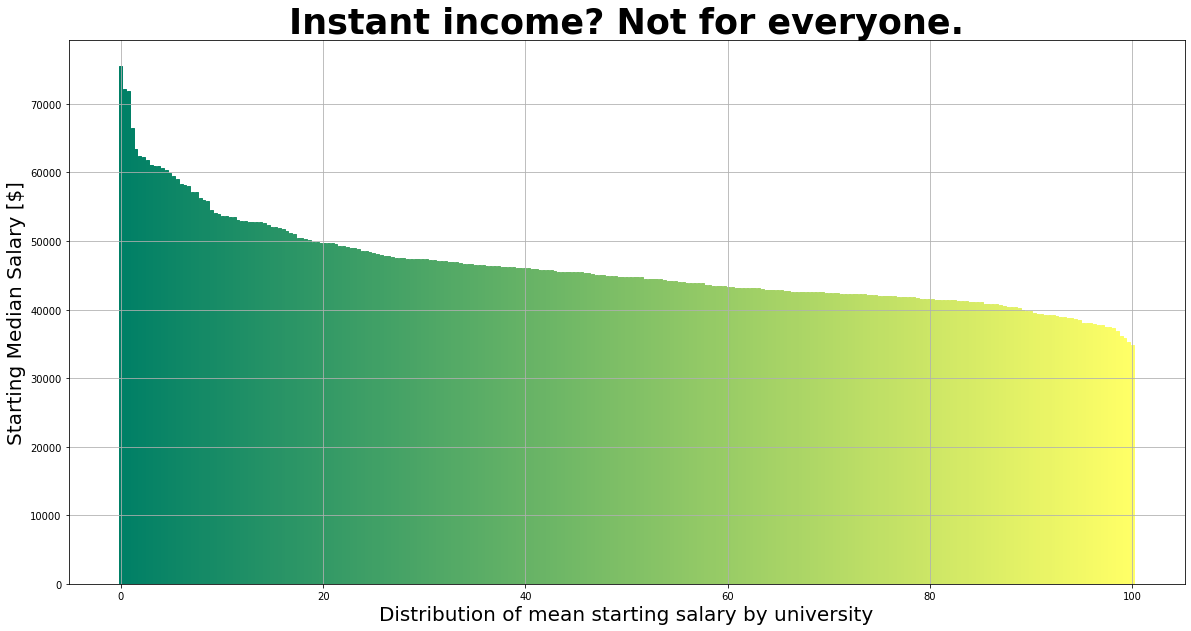

In [127]:
short_term = college.sort_values('start_p50', ascending = False)
values = short_term['start_p50'].tolist()
ind = np.arange(len(values))

# Creating new plot
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

for i, b in enumerate(bars) :
    b.set_color(plt.cm.summer(1. * i / (len(values) - 1)))
    

plt.ylabel('Starting Median Salary [$]', fontsize=20)
plt.xlabel('Distribution of mean starting salary by university', fontsize=20)
plt.title('Instant income? Not for everyone.', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), (len(ind)-1)/5), [0, 20, 40, 60, 80, 100])

### 3.2. So you want to be a lawyer?

Text(0.5, 1.0, 'So you want to be a lawyer?')

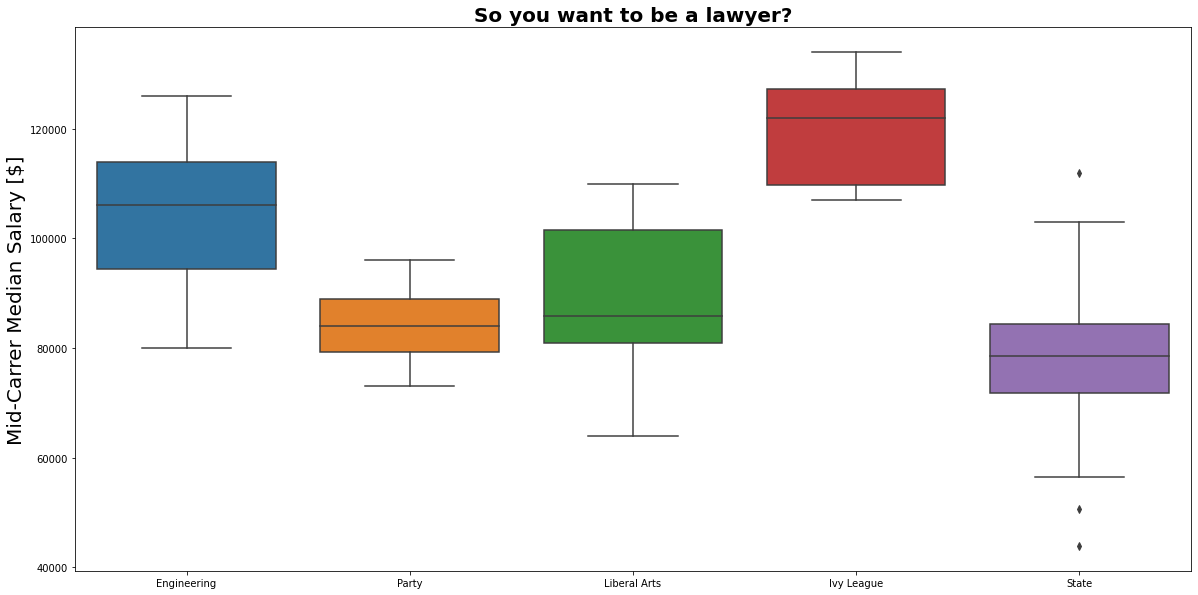

In [128]:
fig = plt.figure(figsize = (20, 10))


sns.boxplot(x = 'type', y = 'mid_p50', data = college)

plt.ylabel('Mid-Carrer Median Salary [$]', fontsize=20)
plt.xlabel('')
plt.title('So you want to be a lawyer?', fontsize=20, fontweight='bold')

- distplot에서 기본적으로 **norm_hist = True**로 설정되어 있음
- True 인 경우 히스토그램의 높이는 개수가 아닌 밀도를 나타냄

- 따라서, 너비를 고려해야함. 즉 높이의 합계가 아니라 곡선 아래의 면적을 계산해야함.

### 3.3. Time makes all the difference

Text(0.5, 1.0, 'Humble beginings')

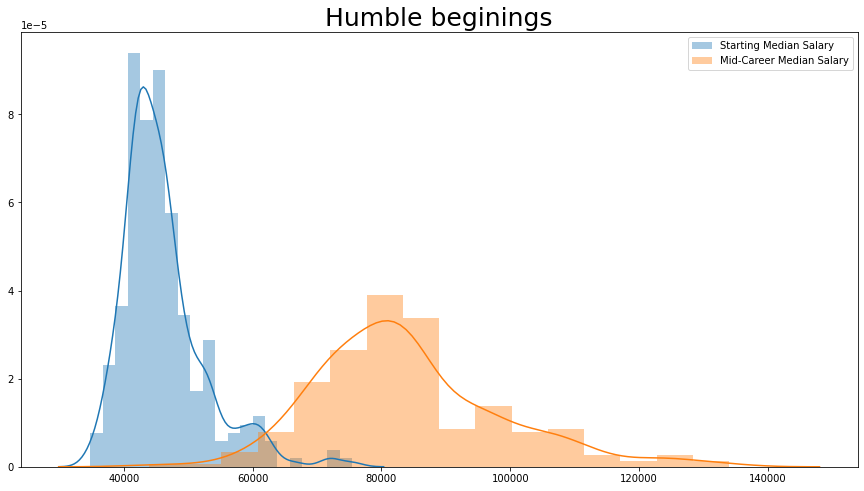

In [129]:
fig = plt.figure(figsize = (15, 8))

hist_data = [college['start_p50'].values, college['mid_p50'].values]

group_labels = ['Starting Median Salary', 'Mid-Career Median Salary']

sns.distplot(college['start_p50'], label = 'Starting Median Salary') 
sns.distplot(college['mid_p50'], label = 'Mid-Career Median Salary')

plt.xlabel('')
plt.legend()
plt.title('Humble beginings', fontsize = 25)


### 3.4. Long term investment

In [154]:
majors_sort

,name,start_p50,mid_p50,increase,mid_p10,mid_p25,mid_p75,mid_p90
49,Spanish,34000.0,53100.0,56.2,31000.0,40000.0,76800.0,96400.0
47,Religion,34100.0,52000.0,52.5,29700.0,36500.0,70900.0,96400.0
18,Education,34900.0,52000.0,49.0,29300.0,37900.0,73400.0,102000.0
15,Criminal Justice,35000.0,56300.0,60.9,32200.0,41600.0,80700.0,107000.0
34,Journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
26,Graphic Design,35700.0,59800.0,67.5,36000.0,45500.0,80800.0,112000.0
5,Art History,35800.0,64900.0,81.3,28800.0,42200.0,87400.0,125000.0
16,Drama,35900.0,56900.0,58.5,36700.0,41300.0,79100.0,153000.0
46,Psychology,35900.0,60400.0,68.2,31600.0,42100.0,87500.0,127000.0
39,Music,35900.0,55000.0,53.2,26700.0,40200.0,88000.0,134000.0


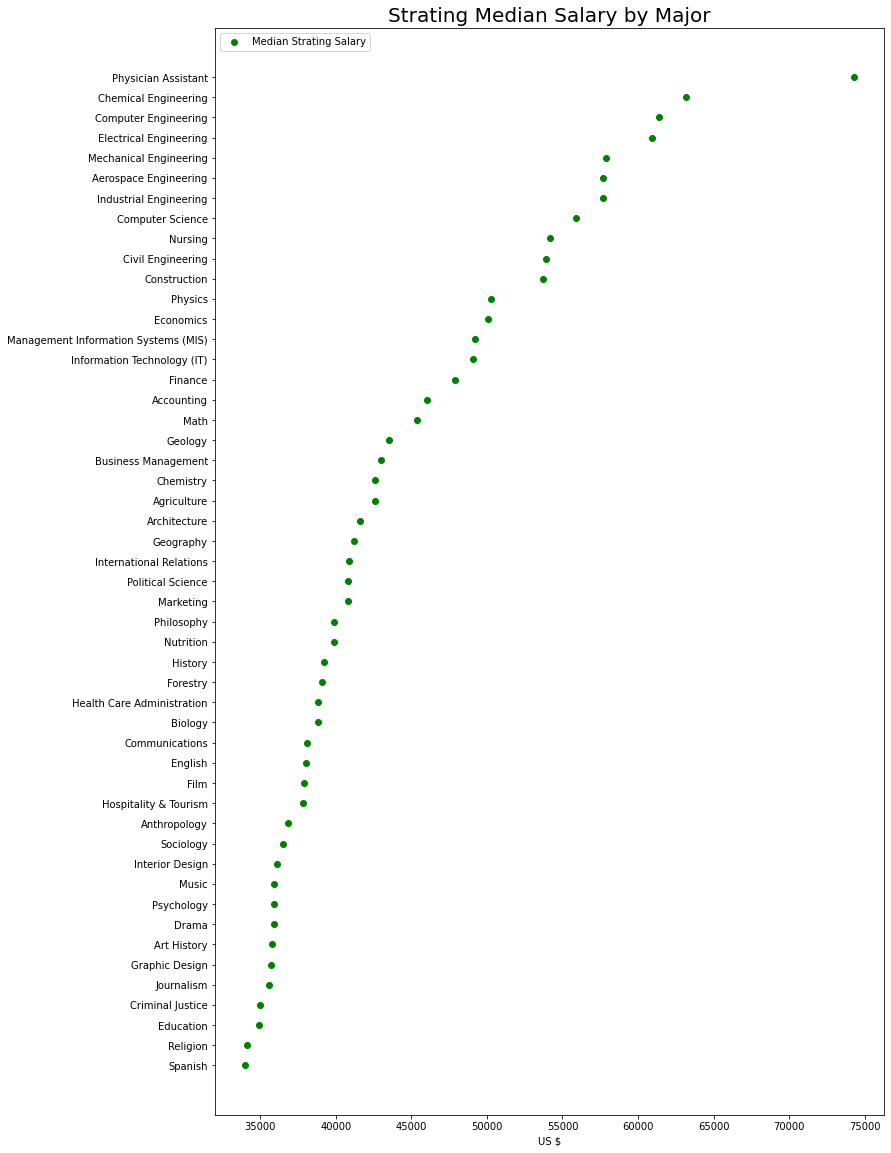

In [166]:
majors_sort = majors.sort_values('start_p50', ascending = True)

fig = plt.figure(figsize = (12, 20))

x1 = majors_sort['start_p50']
y = majors_sort['name']

plt.scatter(x1, y, color = 'g', label = 'Median Strating Salary')
plt.xlabel('US $')
plt.ylabel('')
plt.title('Strating Median Salary by Major', fontsize = 20)
plt.legend(loc = 2)

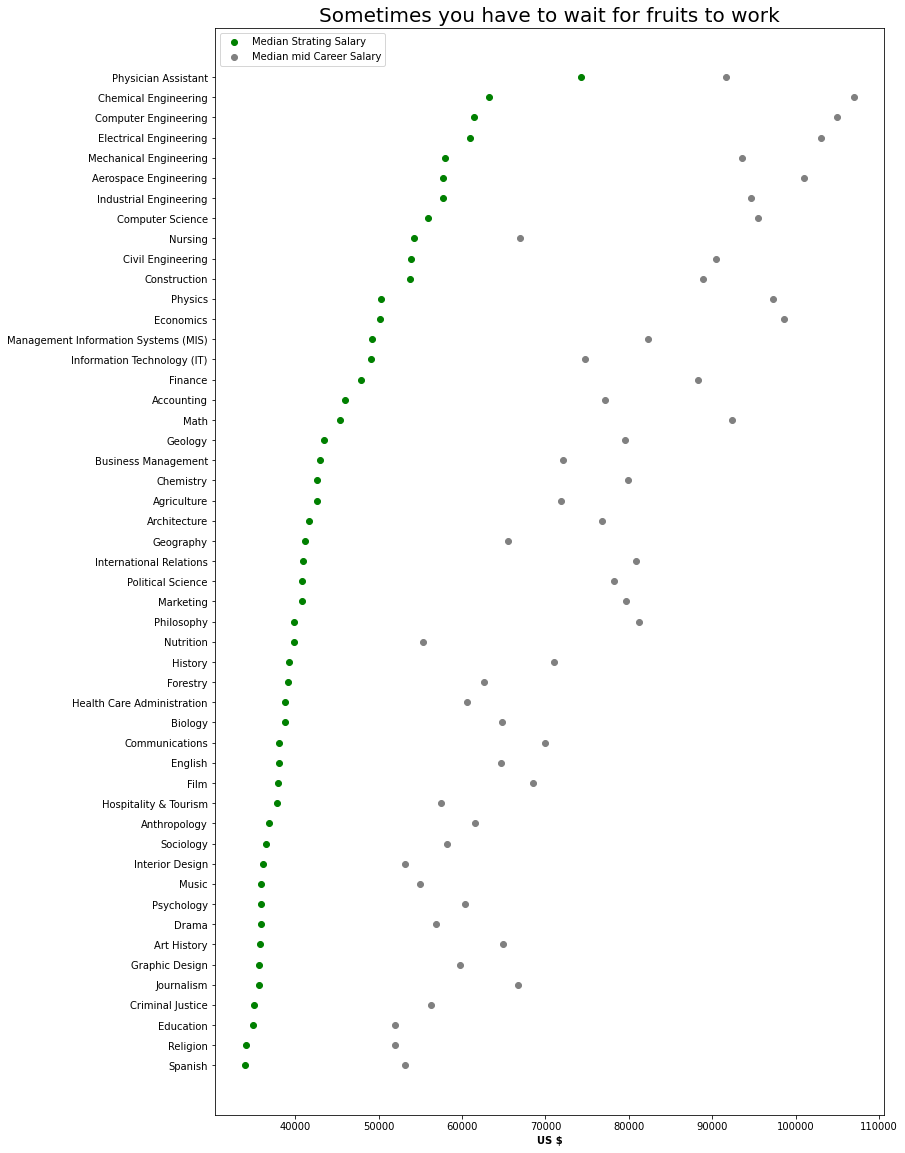

In [175]:
majors_sort = majors.sort_values('start_p50', ascending = True)

fig = plt.figure(figsize = (12, 20))

x1 = majors_sort['start_p50']
y = majors_sort['name']

plt.scatter(x1, y, color = 'g', label = 'Median Strating Salary')

x2 = majors_sort['mid_p50']

plt.scatter(x2, y, color = 'grey', label = 'Median mid Career Salary')

plt.xlabel('US $', fontsize = 10, weight = 'bold')
plt.ylabel('')
plt.title('Sometimes you have to wait for fruits to work', fontsize = 20)
plt.legend(loc = 2)

### 3.5. Biggest money makers

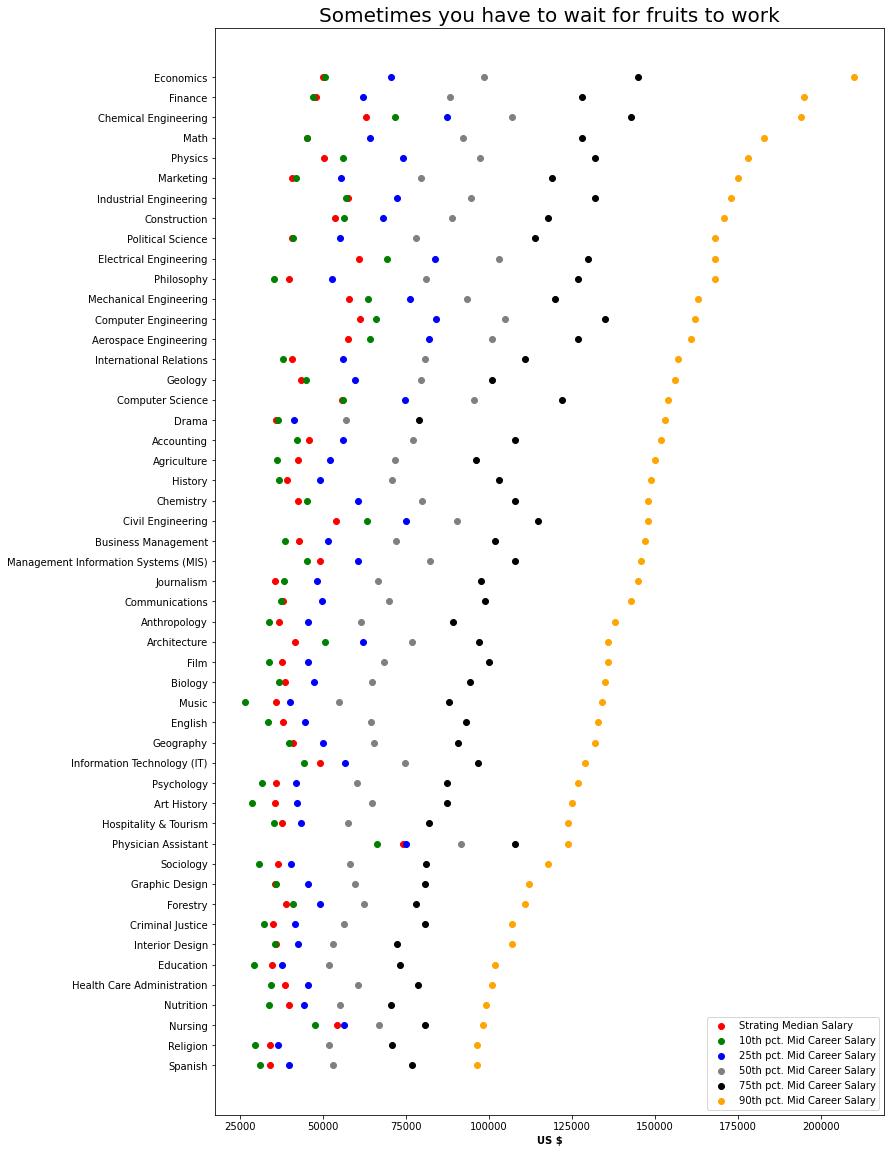

In [177]:
majors_sort = majors.sort_values('mid_p90', ascending = True)

fig = plt.figure(figsize = (12, 20))

x1 = majors_sort['start_p50']
y = majors_sort['name']
plt.scatter(x1, y, color = 'r', label = 'Strating Median Salary')

x2 = majors_sort['mid_p10']
plt.scatter(x2, y, color = 'g', label = '10th pct. Mid Career Salary')

x3 = majors_sort['mid_p25']
plt.scatter(x3, y, color = 'b', label = '25th pct. Mid Career Salary')

x4 = majors_sort['mid_p50']
plt.scatter(x4, y, color = 'grey', label = '50th pct. Mid Career Salary')

x5 = majors_sort['mid_p75']
plt.scatter(x5, y, color = 'black', label = '75th pct. Mid Career Salary')

x6 = majors_sort['mid_p90']
plt.scatter(x6, y, color = 'orange', label = '90th pct. Mid Career Salary')



plt.xlabel('US $', fontsize = 10, weight = 'bold')
plt.ylabel('')
plt.title('Sometimes you have to wait for fruits to work', fontsize = 20)
plt.legend(loc = 4)